In [75]:
# new jupyter project notebook file
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [76]:
#import data file
data_file = Path("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")

In [77]:
#look at datafile
data_file_df = pd.read_csv(data_file)
data_file_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [78]:
#To check for the Duplicate value
duplicate_values = data_file_df.duplicated().sum()
duplicate_values
#duplicate values was 24206
len(data_file_df)
#total count =253680


253680

In [79]:
# To remove the duplicated values
data_file_df.drop_duplicates(inplace = True)
len(data_file_df)

229474

In [80]:
#show datatypes
data_file_df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [81]:
#show subset of columns to analyse
diabetes_age_sex_bmi = data_file_df[["Diabetes_binary", "BMI","Sex","Age"]]
diabetes_age_sex_bmi.head(10)

,Diabetes_binary,BMI,Sex,Age
0,0.0,40.0,0.0,9.0
1,0.0,25.0,0.0,7.0
2,0.0,28.0,0.0,9.0
3,0.0,27.0,0.0,11.0
4,0.0,24.0,0.0,11.0
5,0.0,25.0,1.0,10.0
6,0.0,30.0,0.0,9.0
7,0.0,25.0,0.0,11.0
8,1.0,30.0,0.0,9.0
9,0.0,24.0,1.0,8.0


In [82]:
#GROUP BMI into buckets

df1=diabetes_age_sex_bmi
#set range for BMI
bins = [0,18,25,30,100]
#name the ranges
group_names=['Underweight','Healthy','Overweight','Obese']
#new column
df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)

df1.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_37428\2164732836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP
0,0.0,40.0,0.0,9.0,Obese
1,0.0,25.0,0.0,7.0,Healthy
2,0.0,28.0,0.0,9.0,Overweight
3,0.0,27.0,0.0,11.0,Overweight
4,0.0,24.0,0.0,11.0,Healthy
5,0.0,25.0,1.0,10.0,Healthy
6,0.0,30.0,0.0,9.0,Overweight
7,0.0,25.0,0.0,11.0,Healthy
8,1.0,30.0,0.0,9.0,Overweight
9,0.0,24.0,1.0,8.0,Healthy


In [83]:
#GROUP Age into buckets

df2=df1

#set range for Age
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#name the ranges
group_names=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
#new column
df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)

df2.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_37428\4108418551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74
5,0.0,25.0,1.0,10.0,Healthy,65-69
6,0.0,30.0,0.0,9.0,Overweight,60-64
7,0.0,25.0,0.0,11.0,Healthy,70-74
8,1.0,30.0,0.0,9.0,Overweight,60-64
9,0.0,24.0,1.0,8.0,Healthy,55-59


In [84]:
#set bmi_group as index
# df_bmi = df2.set_index("BMI_GROUP")
df_bmi = df2.reindex()
df_bmi.head()

,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74


In [85]:
#format to age by diabetes
df_bmi_plot = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
df_bmi_plot

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
95,60-64,Healthy,1.0
96,30-34,Obese,1.0
97,60-64,Obese,0.0
98,70-74,Overweight,0.0


In [206]:
#filter to only diabetics
df_bmi_plot_diabetics = df_bmi.loc[df_bmi['Diabetes_binary'] == 1]
# df_bmi_plot_ = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
df_bmi_plot_diabetics = df_bmi_plot_diabetics.loc[:, ["Age_GROUP","BMI_GROUP","Diabetes_binary"]]
df_bmi_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
8,60-64,Overweight,1.0
10,80+,Healthy,1.0
13,70-74,Overweight,1.0
17,50-54,Healthy,1.0
23,80+,Overweight,1.0
...,...,...,...
253659,45-49,Obese,1.0
253668,65-69,Overweight,1.0
253670,80+,Healthy,1.0
253676,70-74,Underweight,1.0


In [214]:
#filter with BMI_GROUP not healthy
df_bmi_age_plot_diabetics = df_bmi_plot_diabetics.loc[df_bmi['BMI_GROUP'] != 'Healthy'] 

diabetics_by_age = df_bmi_age_plot_diabetics.groupby('Age_GROUP')

# Count how many times each road type appears in our group
count_diabetics = diabetics_by_age['Age_GROUP'].count()

count_diabetics

Age_GROUP
18-24      53
25-29     107
30-34     262
35-39     540
40-44     960
45-49    1561
50-54    2706
55-59    3760
60-64    4995
65-69    5634
70-74    4258
75-79    2708
80+      2203
Name: Age_GROUP, dtype: int64

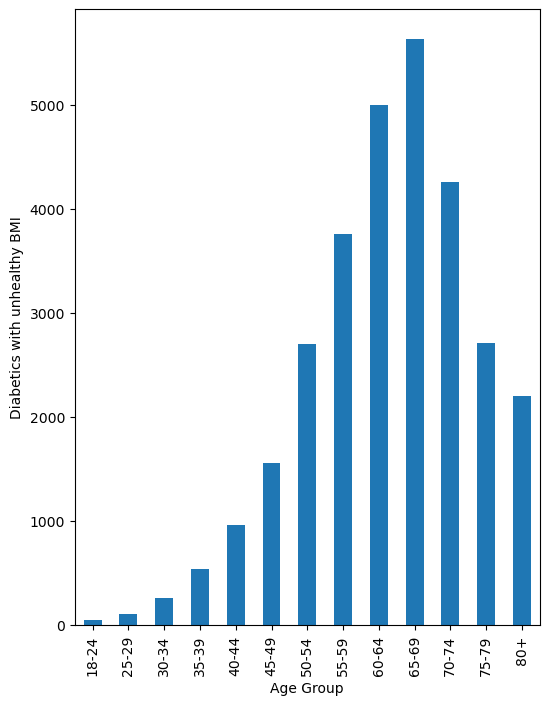

<Figure size 640x480 with 0 Axes>

In [221]:
# Create a bar chart based off of the group series from before
count_chart = count_diabetics.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Age Group")
count_chart.set_ylabel("Diabetics with unhealthy BMI")

plt.show()
plt.tight_layout()

In [174]:
diabetics_by_age.head(100)

,Age_GROUP,Age,Diabetes_binary
8,60-64,9.0,1.0
10,80+,13.0,1.0
13,70-74,11.0,1.0
17,50-54,7.0,1.0
23,80+,13.0,1.0
...,...,...,...
239868,18-24,1.0,1.0
240743,18-24,1.0,1.0
240828,18-24,1.0,1.0
242407,18-24,1.0,1.0


In [205]:
df_bmi_plot_diabetics.head(100)

,Age_GROUP,Age,Diabetes_binary
8,60-64,9.0,1.0
10,80+,13.0,1.0
13,70-74,11.0,1.0
17,50-54,7.0,1.0
23,80+,13.0,1.0
...,...,...,...
406,60-64,9.0,1.0
408,65-69,10.0,1.0
411,70-74,11.0,1.0
417,65-69,10.0,1.0


In [192]:
diabetics_by_age_scatter = df_bmi_plot_diabetics.groupby('Age_GROUP')

# Count how many times each road type appears in our group
diabetics_by_age_scatter = diabetics_by_age_scatter['Diabetes_binary'].count()

diabetics_by_age_scatter

Age_GROUP
18-24      78
25-29     140
30-34     314
35-39     625
40-44    1049
45-49    1741
50-54    3072
55-59    4241
60-64    5681
65-69    6483
70-74    5090
75-79    3383
80+      3200
Name: Diabetes_binary, dtype: int64

In [195]:
df_scatter = pd.DataFrame(diabetics_by_age_scatter)

In [196]:
df_scatter.head(100)

,Diabetes_binary
Age_GROUP,
18-24,78
25-29,140
30-34,314
35-39,625
40-44,1049
45-49,1741
50-54,3072
55-59,4241
60-64,5681


In [187]:
df_scatter.reset_index(drop=True)
df_scatter.head(100)

,Diabetes_binary
Age,
1.0,78
2.0,140
3.0,314
4.0,625
5.0,1049
6.0,1741
7.0,3072
8.0,4241
9.0,5681


In [202]:
df_scatter['Age'] = df_scatter.index

<Axes: xlabel='Age', ylabel='Diabetes_binary'>

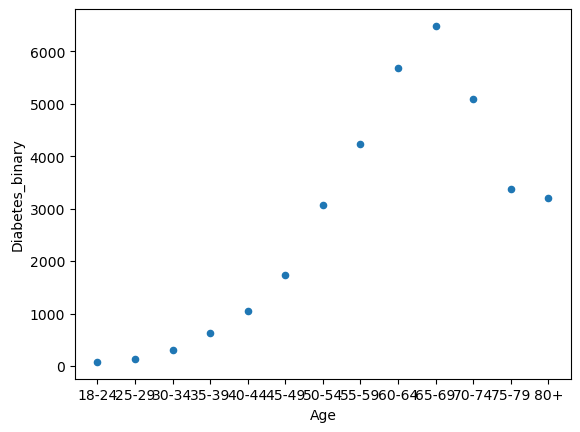

In [220]:
df_scatter.plot(kind='scatter', x='Age', y='Diabetes_binary')

In [226]:
#Males(1) and Females(0) with physical health or injury (1-30days)
#show subset of columns to analyse
diabetes_sex_health = data_file_df[["Diabetes_binary","Sex","PhysHlth"]]
diabetes_sex_health.head(10)

,Diabetes_binary,Sex,PhysHlth
0,0.0,0.0,15.0
1,0.0,0.0,0.0
2,0.0,0.0,30.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,1.0,2.0
6,0.0,0.0,14.0
7,0.0,0.0,0.0
8,1.0,0.0,30.0
9,0.0,1.0,0.0


In [246]:
#create array of Males with and without diabetes
#Males
diabetes_male_diabetics = diabetes_sex_health.loc[(diabetes_sex_health['Sex'] == 1) & (diabetes_sex_health['PhysHlth'] != 0)]

diabetes_male_diabetics = diabetes_male_diabetics.groupby('Diabetes_binary')

diabetes_male_count = diabetes_male_diabetics['Diabetes_binary'].count()
diabetes_male_count

Diabetes_binary
0.0    28848
1.0     8003
Name: Diabetes_binary, dtype: int64

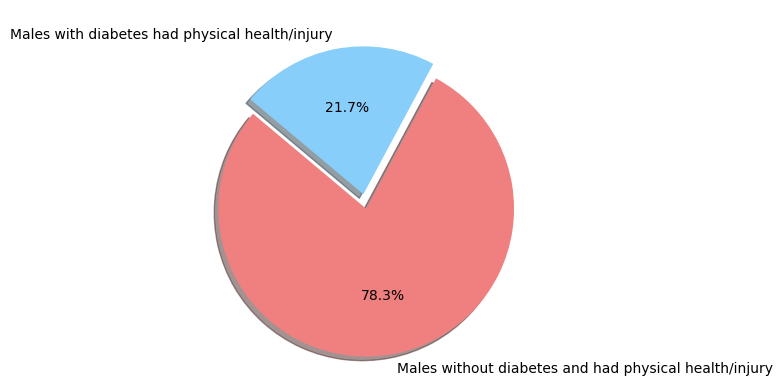

In [248]:
#pie chart of male with/out diabetes
# Labels for the sections of our pie chart
labels = ["Males without diabetes and had physical health/injury", "Males with diabetes had physical health/injury"]

# The values of each section of the pie chart
sizes = [28848,8003]

# The colours of each section of the pie chart
colours = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [235]:
#create array of females with and without diabetes
#Females
diabetes_female_diabetics = diabetes_sex_health.loc[(diabetes_sex_health['Sex'] == 0) & (diabetes_sex_health['PhysHlth'] != 0)]

diabetes_female_diabetics = diabetes_female_diabetics.groupby('Diabetes_binary')

diabetes_female_diabetics = diabetes_female_diabetics['Diabetes_binary'].count()
diabetes_female_diabetics

Diabetes_binary
0.0    110370
1.0     18345
Name: Diabetes_binary, dtype: int64

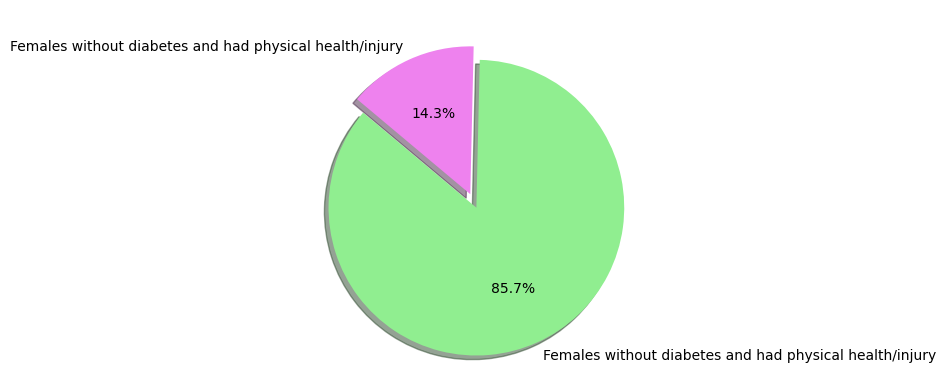

In [250]:
#pie chart of female with/out diabetes
# Labels for the sections of our pie chart
labels = ["Females without diabetes and had physical health/injury", "Females without diabetes and had physical health/injury"]

# The values of each section of the pie chart
sizes = [110370,18345]

# The colours of each section of the pie chart
colours = ["lightgreen", "violet"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()